In [1]:
import tensorflow as tf
import numpy as np

# Create 100 phony x, y data points in NumPy, y = x * 0.1 + 0.3
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 0.1 + 0.3

# Try to find values for W and b that compute y_data = W * x_data + b
# (We know that W should be 0.1 and b 0.3, but TensorFlow will
# figure that out for us.)
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

# Minimize the mean squared errors.
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

# Before starting, initialize the variables.  We will 'run' this first.
init = tf.initialize_all_variables()

# Launch the graph.
sess = tf.Session()
sess.run(init)

# Fit the line.
new_W = []
new_b = []
for step in range(201):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(W), sess.run(b))
        new_W.append(sess.run(W)[0])
        new_b.append(sess.run(b)[0])

# Learns best fit is W: [0.1], b: [0.3]


0 [ 0.37189513] [ 0.21250036]
20 [ 0.16562952] [ 0.26736215]
40 [ 0.11703334] [ 0.29152927]
60 [ 0.10442078] [ 0.29780152]
80 [ 0.10114735] [ 0.29942942]
100 [ 0.10029779] [ 0.29985192]
120 [ 0.1000773] [ 0.29996157]
140 [ 0.10002007] [ 0.29999003]
160 [ 0.10000522] [ 0.29999742]
180 [ 0.10000136] [ 0.29999933]
200 [ 0.10000035] [ 0.29999983]


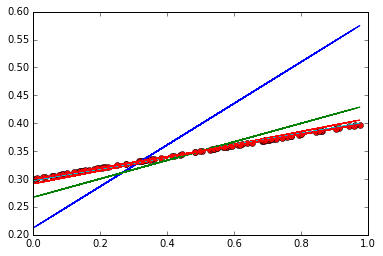

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'ro')
for i in range(10):
    plt.plot(x_data, x_data * new_W[i] + new_b[i])
#plt.axis([0, 6, 0, 20])
plt.show()

In [3]:
print(new_W)

[0.37189513, 0.16562952, 0.11703334, 0.10442078, 0.10114735, 0.10029779, 0.1000773, 0.10002007, 0.10000522, 0.10000136, 0.10000035]
